In [1]:
import numpy as np

In [15]:
def build_lagr_basis(q,e):
    n_q_pts=q.shape[0]
    n_e_pts=e.shape[0]
    
    basis = np.ones((n_e_pts,n_q_pts),dtype=np.float64)
    
    for i in range(n_e_pts):
        for j in range(n_q_pts):
            for k in range(n_q_pts):
                if k==j:
                    continue
                basis[i,j] *= (e[i] - q[k])/(q[j] - q[k])
    return basis


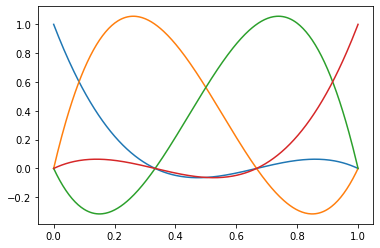

In [29]:
import matplotlib.pyplot as plt

e=np.linspace(0,1,300)
q=np.linspace(0,1,4)

basis = build_lagr_basis(q,e)

plt.plot(e,basis)

In [24]:
def interpolate(f,q,e):
    n_q_pts=q.shape[0]
    n_e_pts=e.shape[0]
    
    basis = build_lagr_basis(q,e)
    
    f_e = np.zeros((n_e_pts),dtype=np.float64)
    
    for i in range(n_e_pts):
        for j in range(n_q_pts):
            f_e[i] += basis[i,j]*f(q[j])
    return f_e
    
    

In [25]:
def f(x):
    return np.sin(2*np.pi*x)

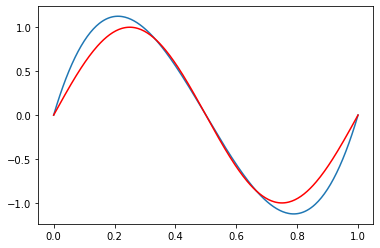

In [30]:
f_interp = interpolate(f,q,e)
plt.plot(e,f_interp)
plt.plot(e,f(e),color="red")

In [31]:
def build_lagr_basis_2d(q_x,q_y,e_x,e_y):
    
    n_q_x_pts=q_x.shape[0]
    n_q_y_pts=q_y.shape[0]
    n_e_x_pts=e_x.shape[0]
    n_e_y_pts=e_y.shape[0]
    
    basis_shape = (n_e_x_pts,n_e_y_pts,n_q_x_pts,n_q_y_pts)
    basis = np.empty(basis_shape,dtype=np.float64)
    
    bx = build_lagr_basis(q_x,e_x)
    by = build_lagr_basis(q_y,e_y)
    
    for i in range (n_e_x_pts):
        for j in range (n_e_y_pts):
            for k in range (n_q_x_pts):
                for l in range (n_q_y_pts):
                    basis[i,j,k,l] = bx[i,k]*by[j,l]
    return basis





In [61]:
q_x = np.linspace(0,1,10)
q_y = np.linspace(0,1,10)
e_x = np.linspace(0,1,25)
e_y = np.linspace(0,1,25)

build_lagr_basis_2d(q_x,q_y,e_x,e_y)

array([[[[ 1.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
          -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, ...,
          -0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e+00, -0.00000000e+00,  0.00000000e+00]],

        [[ 3.01874735e-01,  1.63012357e+00, -2.50788241e+00, ...,
           6.15140969e-01, -1.33616686e-01,  1.31249885e-02],
         [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00, ...,
           0.00000000e

In [72]:
def evaluate_func(func,e_x,e_y):
    n_e_x_pts=e_x.shape[0]
    n_e_y_pts=e_y.shape[0]
    
    f_e = np.empty((n_e_x_pts,n_e_y_pts),dtype=np.float64)
    
    for i in range (n_e_x_pts):
        for j in range (n_e_y_pts):
            f_e[i,j] = func(e_x[i],e_y[j])
    return f_e

In [82]:
def interpolate_2d(f,q_x,q_y,e_x,e_y):
    n_q_x_pts=q_x.shape[0]
    n_q_y_pts=q_y.shape[0]
    n_e_x_pts=e_x.shape[0]
    n_e_y_pts=e_y.shape[0]
    
    basis = build_lagr_basis_2d(q_x,q_y,e_x,e_y)
    
    f_e = np.zeros((n_e_x_pts,n_e_y_pts),dtype=np.float64)
    
    f_eval = evaluate_func(f,q_x,q_y)
    
    for i in range (n_e_x_pts):
        for j in range (n_e_y_pts):
            for k in range (n_q_x_pts):
                for l in range (n_q_y_pts):
                    f_e[i,j] +=  basis[i,j,k,l]*f_eval[k,l]

    return f_e

In [80]:
def fxy(x,y):
    return np.sin(2*np.pi*x) + y*y

In [83]:
fxy_interp = interpolate_2d(fxy,q_x,q_y,e_x,e_y)

In [84]:
fxy_eval = evaluate_func(fxy,e_x,e_y)

In [85]:
np.max(np.abs(fxy_interp - fxy_eval))

6.787240547784235e-05

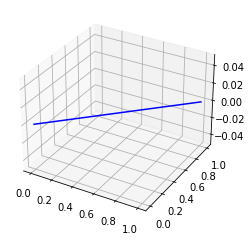